In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('bankloan.csv')

In [24]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### About this dataset
- **ID** - Customer ID
- **Age** - Customer Age 
- **Experience** - Customer Experience
- **Income** - Customer Income
- **ZIP.Code** - Customer's residence ZIP Code
- **Family** - Number of family members of a Customer
- **CCAvg** - Credit Card Average Score
- **Education** - Education of a Customer
- **Mortage** - Mortgage taken or not by a Customer
- **Personal.Loan** - Personal Loan given or not (Target Variable)
- **Securities.Account** - Having or not having a securities account
- **CD.Account** - Having or not having a CD Account
- **Online** - Having or not an online banking
- **CreditCard** - Having or not a credit card

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [26]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [27]:
df.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [28]:
df['Personal.Loan'].sum()

480

In [29]:
df[df['Experience'] < 0]['Experience'].count()

52

In [30]:
df['Experience'] = abs(df['Experience'])

In [31]:
df[df['Experience'] < 0]['Experience'].count()

0

In [32]:
df.drop(['ID','ZIP.Code'], inplace=True, axis=1)

Text(0, 0.5, 'Count')

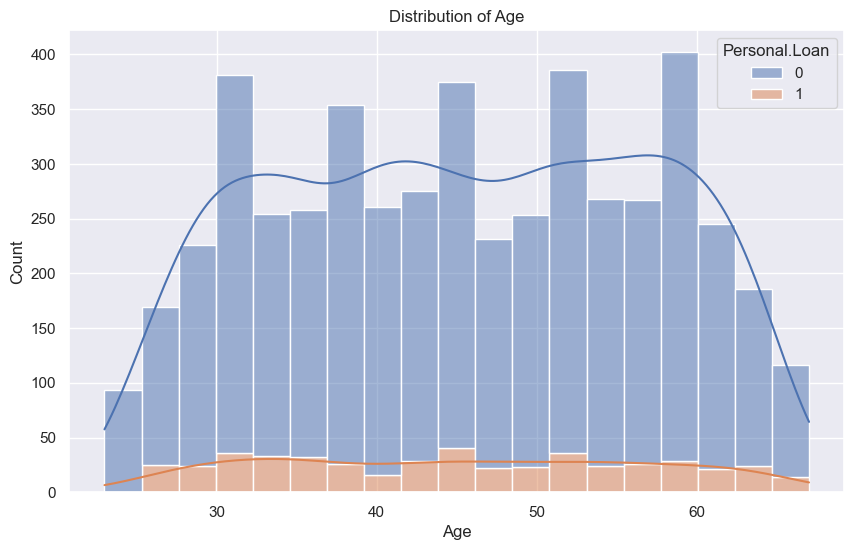

In [33]:
fig = plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.histplot(data=df, x='Age', multiple='stack', kde=True, color='darkblue', hue='Personal.Loan')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0.5, 1.0, 'corrplot of the entire dataframe')

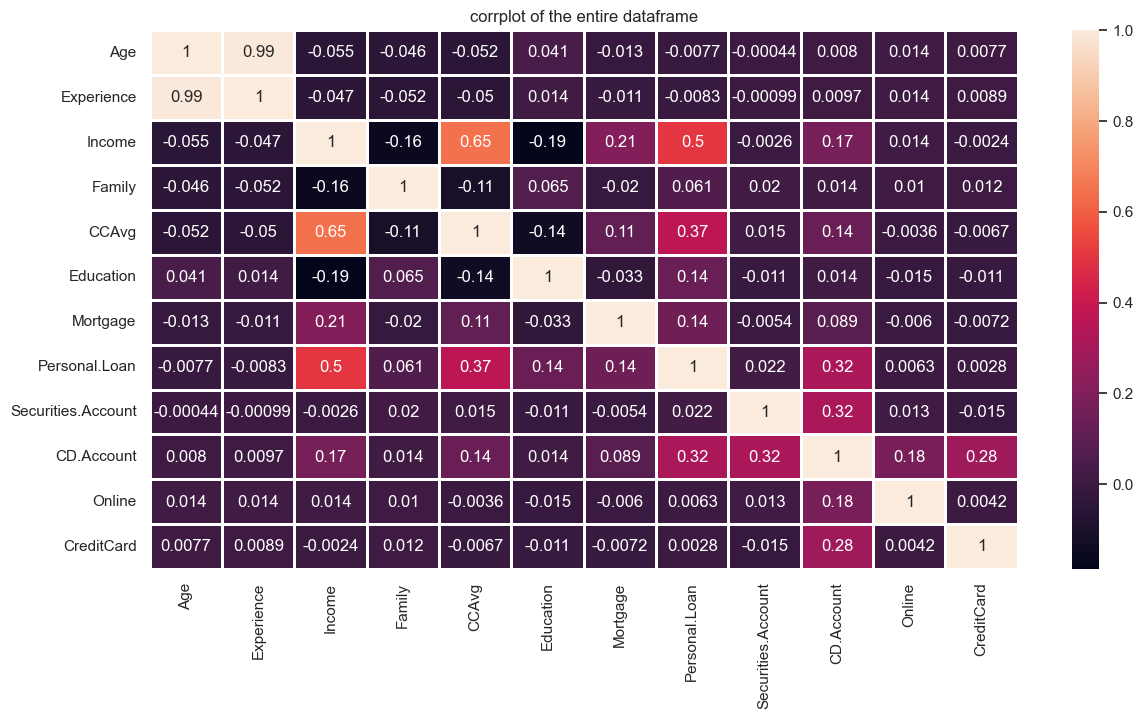

In [34]:
fig = plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=1)
plt.title('corrplot of the entire dataframe')

Text(0.5, 1.0, 'Income vs CCAvg')

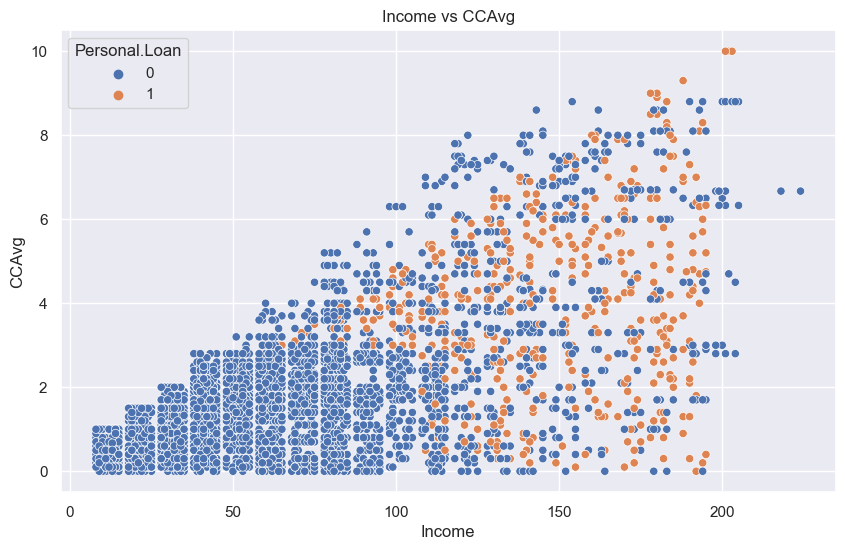

In [35]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Income', y='CCAvg', hue='Personal.Loan')
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.title('Income vs CCAvg')

Text(0, 0.5, 'Count')

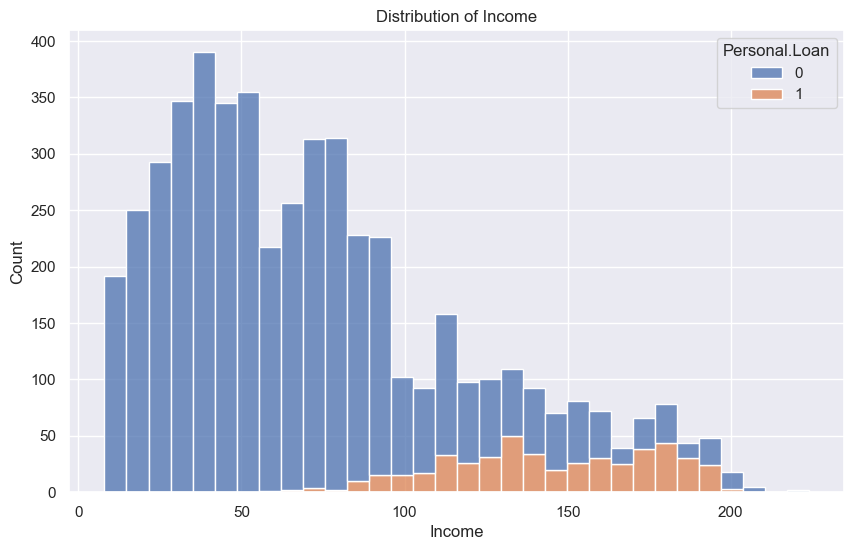

In [36]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Income', hue='Personal.Loan', multiple='stack')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

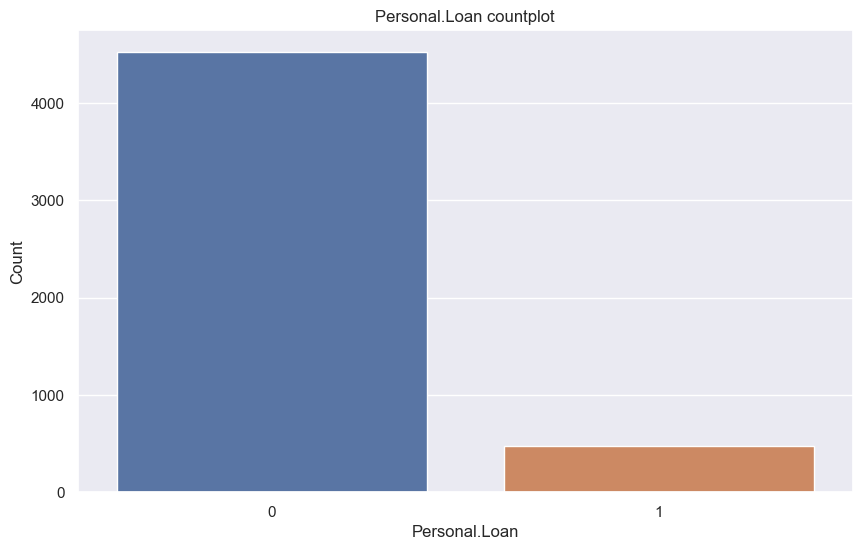

In [37]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Personal.Loan', palette='deep')
plt.title('Personal.Loan countplot')
plt.xlabel('Personal.Loan')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

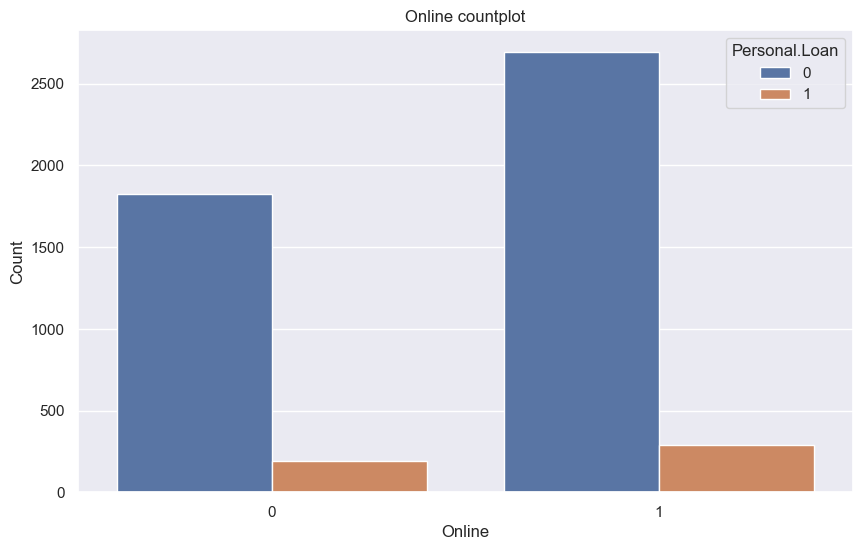

In [38]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Online', hue='Personal.Loan')
plt.title('Online countplot')
plt.xlabel('Online')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

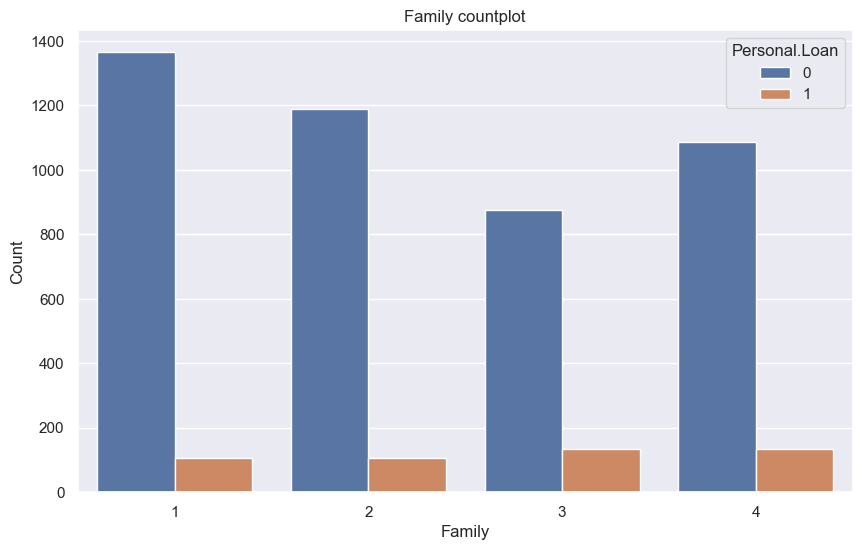

In [39]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Family', hue='Personal.Loan')
plt.title('Family countplot')
plt.xlabel('Family')
plt.ylabel('Count')

In [40]:
def logistic_regression(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    print(classification_report(y_test, lr_pred))
    print(confusion_matrix(y_test, lr_pred))
    return f1_score(y_test, lr_pred)

In [41]:
f1_lr = logistic_regression(df, 'Personal.Loan')

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.86      0.53      0.66       146

    accuracy                           0.95      1500
   macro avg       0.90      0.76      0.81      1500
weighted avg       0.94      0.95      0.94      1500

[[1341   13]
 [  68   78]]


In [52]:
def knn(data, target):
    data_stand = data.drop(['Personal.Loan', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard'], axis=1)
    scaler = StandardScaler()
    scaler.fit(data_stand)
    scaled = scaler.transform(data_stand)
    data_feat = pd.DataFrame(data=scaled, columns=data_stand.columns)
    data_feat = pd.concat([data_feat, data[['Securities.Account', 'CD.Account', 'Online', 'CreditCard']]], axis=1)
    X = data_feat
    y = data['Personal.Loan']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
    error_rate = []
    for i in range(1,100):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(10,6))
    plt.plot(range(1,100), error_rate, color='blue', linestyle='dashed', marker='o',
            markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    knn_min = np.min(error_rate)
    knn_min_index = np.argmin(error_rate)
    print(f'min erro value: {knn_min}, when n = {knn_min_index}')
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    print(classification_report(y_test, knn_pred))
    print(confusion_matrix(y_test, knn_pred))
    return f1_score(y_test, knn_pred)

min erro value: 0.035333333333333335, when n = 4
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1358
           1       0.99      0.56      0.72       142

    accuracy                           0.96      1500
   macro avg       0.97      0.78      0.85      1500
weighted avg       0.96      0.96      0.95      1500

[[1357    1]
 [  62   80]]


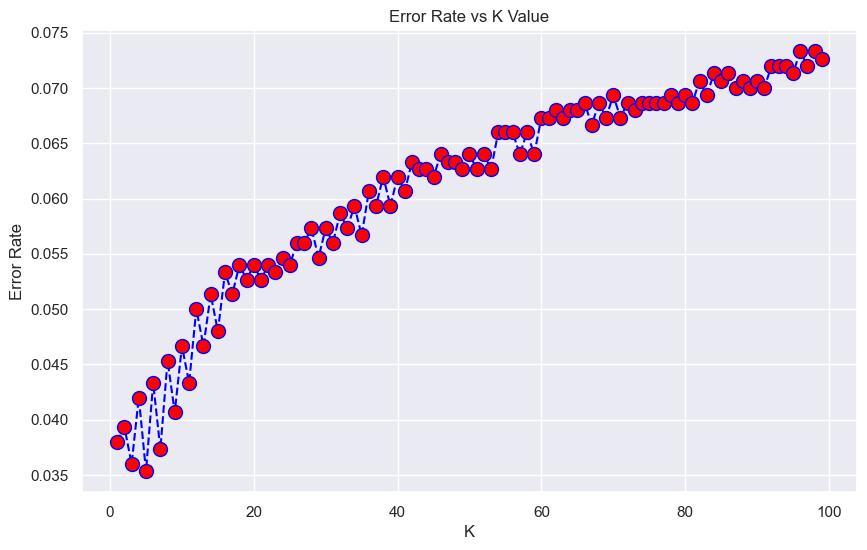

In [53]:
f1_knn = knn(df, 'Personal.Loan')

In [54]:
# Dt and RF
def decision_tree(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    dt_pred = dtree.predict(X_test)
    print(classification_report(y_test, dt_pred))
    print(confusion_matrix(y_test, dt_pred))
    return f1_score(y_test, dt_pred)

In [55]:
f1_dt = decision_tree(df, 'Personal.Loan')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1358
           1       0.89      0.83      0.86       142

    accuracy                           0.97      1500
   macro avg       0.94      0.91      0.92      1500
weighted avg       0.97      0.97      0.97      1500

[[1344   14]
 [  24  118]]


In [56]:
def random_forest(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
    rfc = RandomForestClassifier(n_estimators=200)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    print(classification_report(y_test, rfc_pred))
    print(confusion_matrix(y_test, rfc_pred))
    return f1_score(y_test, rfc_pred)

In [57]:
f1_rf = random_forest(df, 'Personal.Loan')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1358
           1       0.94      0.82      0.88       142

    accuracy                           0.98      1500
   macro avg       0.96      0.91      0.93      1500
weighted avg       0.98      0.98      0.98      1500

[[1351    7]
 [  26  116]]


In [58]:
f1_scores = [f1_lr, f1_knn, f1_dt, f1_rf]
algorithms = ['Logistic Regression', 'KNN Neighbours', 'Decision Tree', 'Random Forest']
df_f1 = pd.DataFrame(data=f1_scores, columns=['F1 Score'], index=algorithms)
df_f1.index.name = 'algorithm'
df_f1

,F1 Score
algorithm,
Logistic Regression,0.658228
KNN Neighbours,0.717489
Decision Tree,0.861314
Random Forest,0.875472


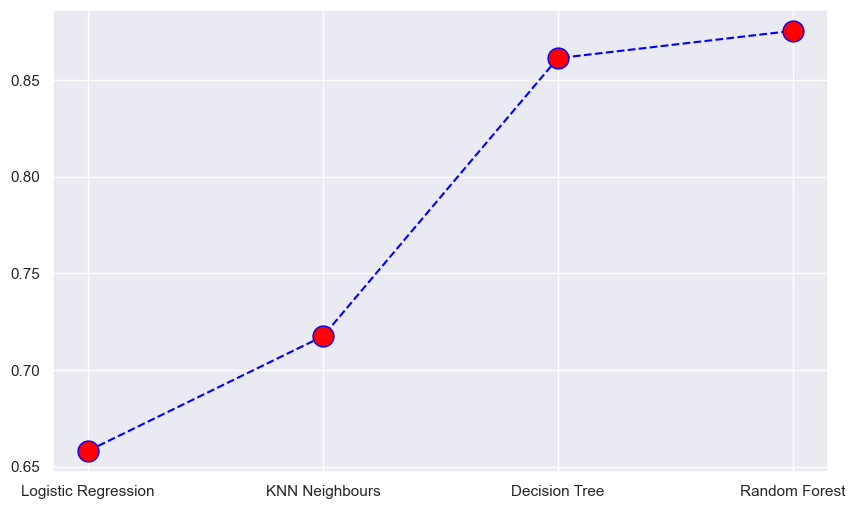

In [59]:
fig = plt.figure(figsize=(10,6))
plt.plot(algorithms, f1_scores, linestyle='--', marker='o', markerfacecolor='red', color='blue', markersize=15)